#Health Insurance Cost Analysis - Exploratory Data Insights

**Dataset Source:**
U.S. Medical Insurance Costs - Kaggle
https://www.kaggle.com/datasets/mirichoi0218/insurance

**Goal:** Explore how demographic and lifestyle factors affect medical charges and uncover trends useful for health plans, risk modeling, and cost prediction.

**Business Context**

Rising medical claims make it critical for health plans to understand:

- Who tends to cost more

- What risk factors drive spending (age, smoking, BMI, etc.).

- How pricing and outreach strategies might differ by population segment

This Notebook covers:

- Data quality assessment

- Feature engineering (age bands, BMI categories)

- Cost comparisons across population groups

- Statistically meaningful patterns

- Visual insights for stakeholder decision-making

**Author:** Ivy Maina

In [19]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)

# Load dataset
df = pd.read_csv("medical_insurance_costs.csv")

df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


This dataset contains medical cost information for individuals across the U.S., including demographic and lifestyle factors commonly used by health plans to estimate risk and pricing.
Each row represents one insurance beneficiary and includes the following fields:

age — age of the primary beneficiary.

sex — male or female.

bmi — Body Mass Index, a proxy for body fat and risk indicators.

children — number of dependents covered under the plan.

smoker — smoking status, a major risk and cost driver.

region — geographic location within the U.S.

charges — individual medical insurance cost billed.

This dataset will be used to explore: Trends in healthcare spending, which features most strongly drive medical costs and otential risk segments (age bands, smoker status, BMI).

##Basic Structure & Summary


In [20]:
# Shape of the data (rows, columns)
df.shape

(1338, 7)

In [21]:
# Column info: types, non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [22]:
# Summary stats for numeric columns
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [23]:
# Missing values per column
df.isnull().sum()


,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


**Data Structure & Summary:**

From the initial data check, the dataset contains:

- 1,338 rows and 7 columns.

- 4 numeric features: age (int), bmi (float), children (int), charges (float, target variable).

- 3 categorical features: sex, smoker, region.

There are no missing values in any column, and all data types align with expectations for healthcare cost analysis (e.g., numeric charges, categorical risk factors).

Key numeric insights (from the summary stats):

- The average age is about 39 years, with values ranging from 18 to 64.

- The average BMI is around 30.7, which is in the overweight range.

- Members have between 0 and 5 children, with a median of 1.

- Medical charges are highly variable, with:

- median ≈ $9.4K

- 75th percentile ≈ $16.6K

- maximum ≈ $63.8K, indicating a small group of very high-cost members.

These patterns are consistent with real-world health plan data, where a minority of members often account for a large portion of total spending.

In [24]:
# Number of duplicated rows
df.duplicated().sum()


np.int64(1)

In [25]:
df = df.drop_duplicates()
df.shape


(1337, 7)

**Duplicate Check & Cleanup:**

A duplicate check revealed 1 duplicated row in the dataset.
Duplicate records can bias model training and inflate summary statistics, so the duplicate was removed.

- Before: 1,338 rows

- Removed: 1 duplicate

- After: 1,337 rows

In [26]:
# Create age bands
df['age_band'] = pd.cut(
    df['age'],
    bins=[17, 30, 45, 60, 80],
    labels=['18-30', '31-45', '46-60', '61-80']
)

df[['age', 'age_band']].head(10)


,age,age_band
0,19,18-30
1,18,18-30
2,28,18-30
3,33,31-45
4,32,31-45
5,31,31-45
6,46,46-60
7,37,31-45
8,37,31-45
9,60,46-60


**Age Band Creation:**

To better understand how medical costs vary across life stages, age values were grouped into clinically meaningful ranges:

Age Band	Meaning:
- 18–30	Young adults
- 31–45	Early mid-life
- 46–60	Late mid-life
- 61+	Older adults approaching retirement

##GroupBy Summaries

In [27]:
#Overall average cost
df['charges'].mean()

np.float64(13279.121486655948)

**Overall Average Charges**

The overallaverage medical charge per individual in this dataset is approximately $13,279.


In [28]:
#Cost by smoker vs non-smoker
df.groupby('smoker')['charges'].mean().round(2)

,charges
smoker,
no,8440.66
yes,32050.23


**Average Charges by Smoker Status**

- Non-smokers: ~$8,441

- Smokers: ~$32,050  

Smokers have nearly 4× higher average medical charges compared to non-smokers.


In [29]:
#cost by age band
df.groupby('age_band')['charges'].mean().round(2)

/tmp/ipython-input-1832624634.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('age_band')['charges'].mean().round(2)


,charges
age_band,
18-30,9415.06
31-45,12647.46
46-60,16340.99
61-80,21063.16


**Average Charges by Age Band**

- **18–30:** ~$9,415

- **31–45:** ~$12,647

- **46–60:** ~$16,341

- **61–80:** ~$21,063  

Medical charges increase steadily with age, with members in the 61–80 band costing over 2× as much on average as those in the 18–30 band.

In [30]:
#Cost by BMI Category
df['bmi_band'] = pd.cut(
    df['bmi'],
    bins=[0, 18.5, 25, 30, 100],
    labels=['Underweight/Normal', 'Normal-High', 'Overweight', 'Obese']
)

df.groupby('bmi_band')['charges'].mean().round(2)


/tmp/ipython-input-2342057197.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('bmi_band')['charges'].mean().round(2)


,charges
bmi_band,
Underweight/Normal,8657.62
Normal-High,10435.44
Overweight,10997.80
Obese,15580.70


**Average Charges by BMI Category**

- **Underweight/Normal:** ~$8,658

- **Normal-High:** ~$10,435  

- **Overweight:** ~$10,998

- **Obese:** ~$15,581  

Higher BMI categories are associated with higher average medical charges, with the obese group showing the highest costs at around $15.6K. This suggests that weight-related risk factors likely translate into higher healthcare utilization and cost.


In [31]:
#Cost by Region
df.groupby('region')['charges'].mean().round(2)

,charges
region,
northeast,13406.38
northwest,12450.84
southeast,14735.41
southwest,12346.94


**Average Charges by Region**

- **Northeast:** ~$13,406

- **Northwest:** ~$12,451

- **Southeast:** ~$14,735

- **Southwest:** ~$12,347  

Regional differences in average charges are noticeable but smaller than differences driven by age, BMI, or smoking status. The **Southeast** shows the highest average charges, while the Southwest and Northwest are on the lower end.


##Visualizations

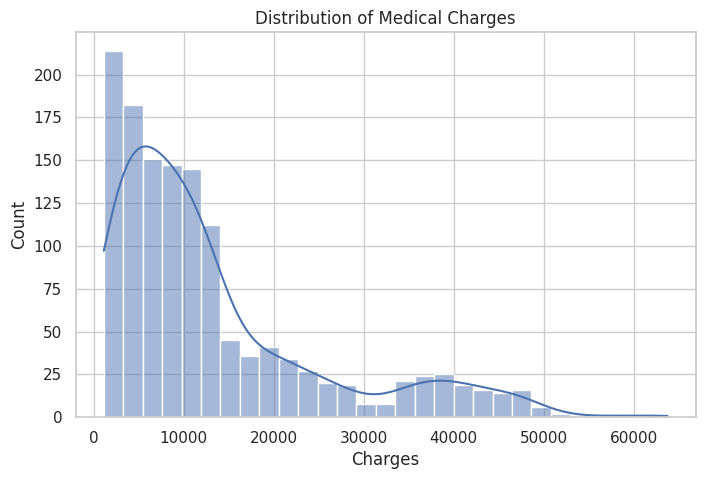

In [32]:
#Distribution of Charges

sns.histplot(df['charges'], kde=True)
plt.title("Distribution of Medical Charges")
plt.xlabel("Charges")
plt.ylabel("Count")
plt.show()

**Distribution of Medical Charges**

The distribution of medical charges is right-skewed, meaning most people incur relatively low to moderate costs, while a smaller number of individuals drive extremely high medical expenses.

This pattern is common in healthcare spending:  
- The majority of members have routine or preventive costs.
- A small group (often with chronic or severe conditions) accounts for a disproportionate share of spending.

This type of skew is exactly why insurers forecast risk and plan reserves carefully. A few high-cost claims can dramatically shift totals.


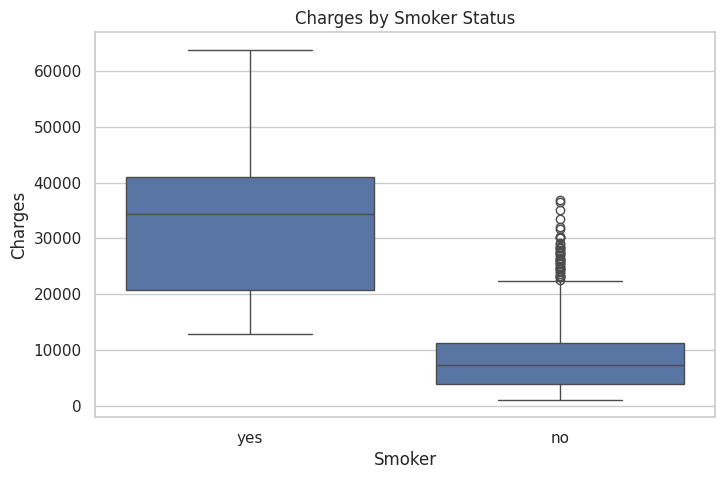

In [33]:
#Charges by smoker

sns.boxplot(data=df, x='smoker', y='charges')
plt.title("Charges by Smoker Status")
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()


**Charges by Smoker Status**

The boxplot comparison between smokers and non-smokers shows a dramatic difference:

- The smoker category has a much higher median charge.
- The spread (IQR) for smokers is significantly wider, indicating more variability.
- There are many more high-cost outliers among smokers.

This indicates that smoking is a major cost driver, increasing both average spending and risk unpredictability. In a health plan context, this validates why smoking cessation programs can produce huge ROI.

/tmp/ipython-input-956078897.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age_band', y='charges', estimator=np.mean, ci=None)


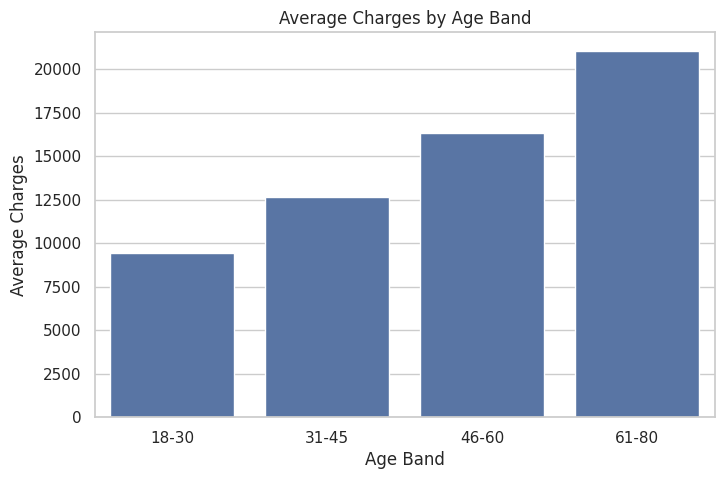

In [34]:
#Charges by age band

sns.barplot(data=df, x='age_band', y='charges', estimator=np.mean, ci=None)
plt.title("Average Charges by Age Band")
plt.xlabel("Age Band")
plt.ylabel("Average Charges")
plt.show()


**Average Charges by Age Group**

The bar chart shows medical charges increase steadily with age:

- Young adults (18–30) have the lowest average costs.
- Costs rise for ages 31–45 and 46–60.
- The highest spend is seen in the 61–80 group.

This trend aligns with how health plans stratify risk and budget medical expense projections. As members age, health needs, chronic conditions, care utilization increase and so do costs.

/tmp/ipython-input-3158771904.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='bmi_band', y='charges', estimator=np.mean, ci=None)


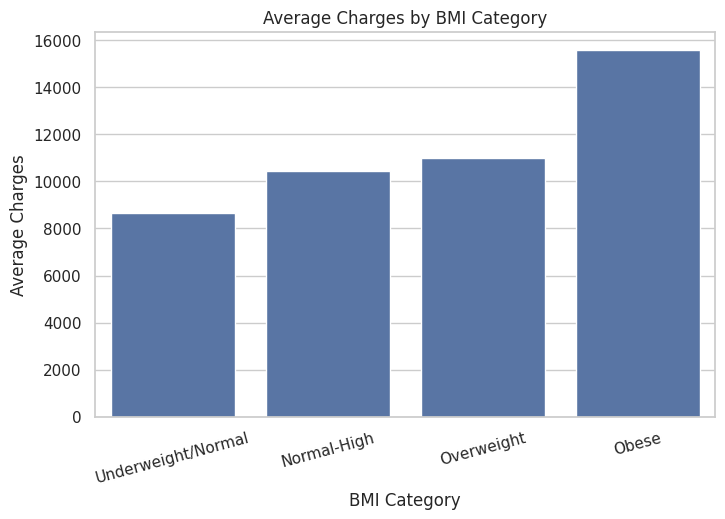

In [35]:
#Charges by BMI band

sns.barplot(data=df, x='bmi_band', y='charges', estimator=np.mean, ci=None)
plt.title("Average Charges by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Average Charges")
plt.xticks(rotation=15)
plt.show()


**Average Charges by BMI Category**

The bar chart reveals a gradual increase in medical spending as BMI rises:

- Underweight/Normal and Normal-High BMI groups show lower average costs.
- Overweight members see incremental increases.
- Obese members have the highest average charges.

This pattern suggests that weight-related health risks (diabetes, hypertension, cardiovascular disease, etc.) likely translate into increased healthcare utilization. Preventive care and wellness engagement could meaningfully reduce cost in this cohort.


/tmp/ipython-input-1458192032.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='region', y='charges', estimator=np.mean, ci=None)


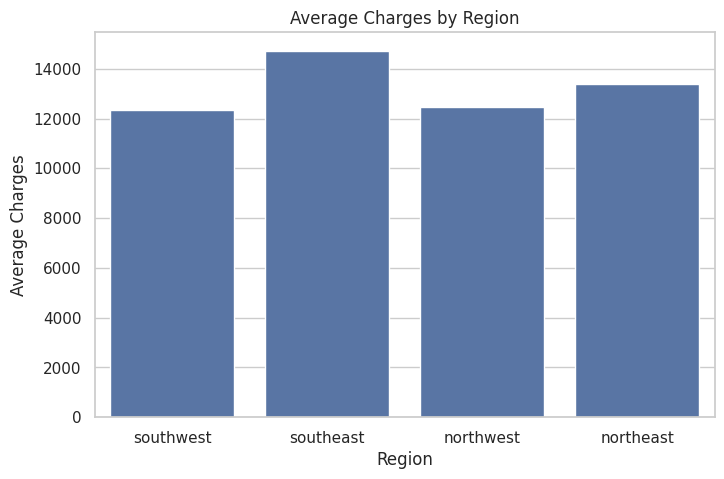

In [36]:
#Charges by region

sns.barplot(data=df, x='region', y='charges', estimator=np.mean, ci=None)
plt.title("Average Charges by Region")
plt.xlabel("Region")
plt.ylabel("Average Charges")
plt.show()



**Average Charges by Region**

Regional differences in average charges appear modest compared to other drivers:

- The Southeast has the highest average costs
- The Southwest and Northwest are slightly lower.
- The Northeast sits near the center.

Unlike age, BMI, or smoking status, **region does not show a strong cost pattern**. Variation could be due to provider pricing differences, benefit utilization, or pockets of high-risk members, but it is not the dominant factor in healthcare costs here.
